In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Heart Prediction Quantum Dataset.csv")

In [3]:
df.head(3)

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1


In [4]:
df.tail(3)

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1
499,55,0,174,249,89,10.492950,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [6]:
df.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


In [10]:
import Siraj_Stats as sstats
for col_name in df.columns:
    # print(col_name)
    sstats.cal_stats(col_name,df[col_name])
    print('-'*50)

Age
Total Sum 27432
Total Count 500
Minimum 30
Maximum 79
Range 49
Average 54.86
Median 55.0
Mode ModeResult(mode=np.int64(62), count=np.int64(18))
Q1 43.0
Q3 66.25
IQR 23.25
Lower Whisker 8.125
Upper Whisker 101.125
Variance 204.50950400000002
Standard Deviation 14.300681941781658
Skewness -0.10559629619505961
Kurtosis -1.1105776246525663
--------------------------------------------------
Gender
Total Sum 234
Total Count 500
Minimum 0
Maximum 1
Range 1
Average 0.47
Median 0.0
Mode ModeResult(mode=np.int64(0), count=np.int64(266))
Q1 0.0
Q3 1.0
IQR 1.0
Lower Whisker -1.5
Upper Whisker 2.5
Variance 0.24897600000000011
Standard Deviation 0.4989749492710031
Skewness 0.12826295206503524
Kurtosis -1.983548615127563
--------------------------------------------------
BloodPressure
Total Sum 66437
Total Count 500
Minimum 90
Maximum 179
Range 89
Average 132.87
Median 132.0
Mode ModeResult(mode=np.int64(140), count=np.int64(12))
Q1 111.0
Q3 155.0
IQR 44.0
Lower Whisker 45.0
Upper Whisker 221.0
V

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'HeartRate',
       'QuantumPatternFeature', 'HeartDisease'],
      dtype='object')

In [13]:
df.isnull().sum()

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

Age


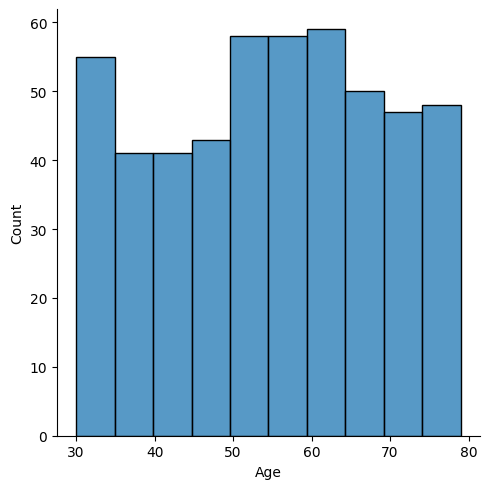

Gender


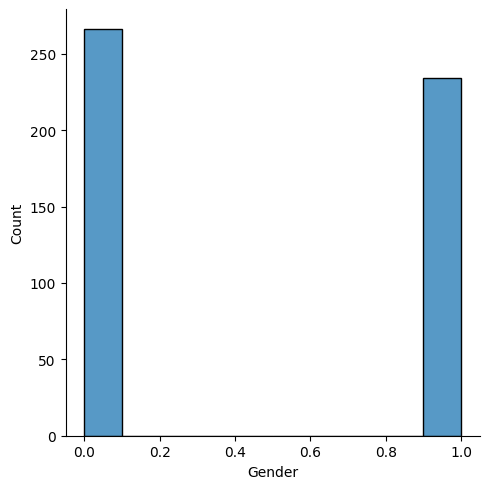

BloodPressure


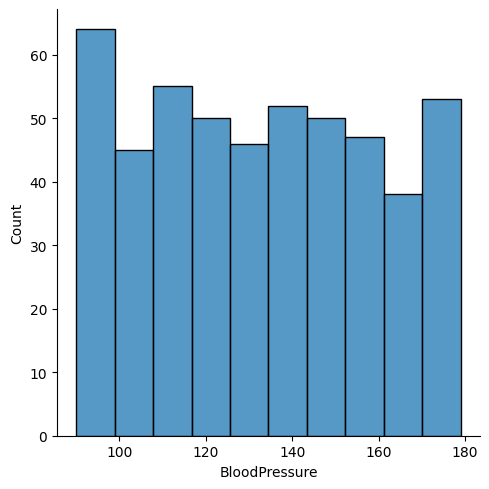

Cholesterol


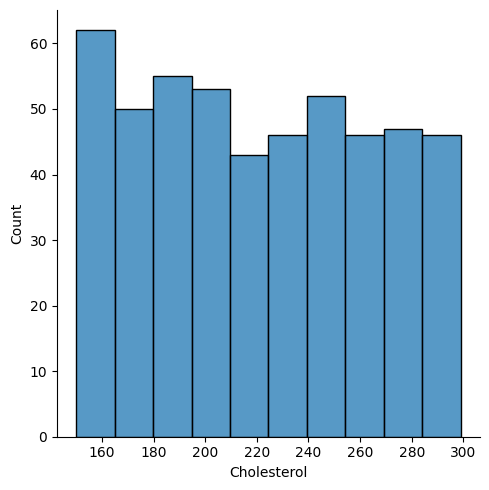

HeartRate


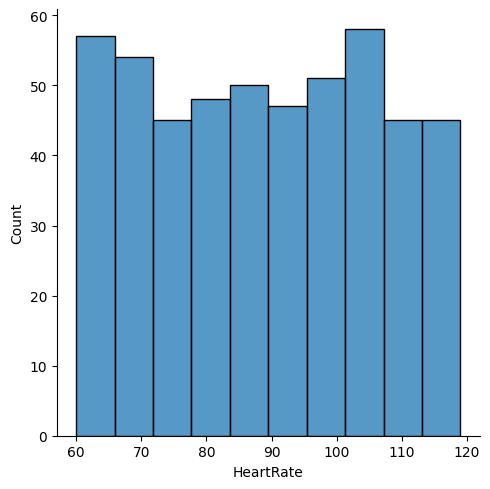

QuantumPatternFeature


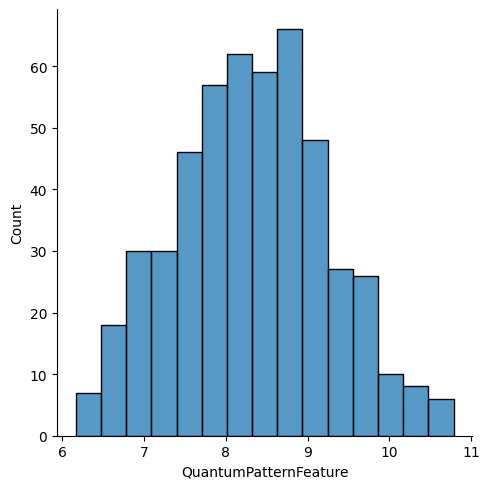

HeartDisease


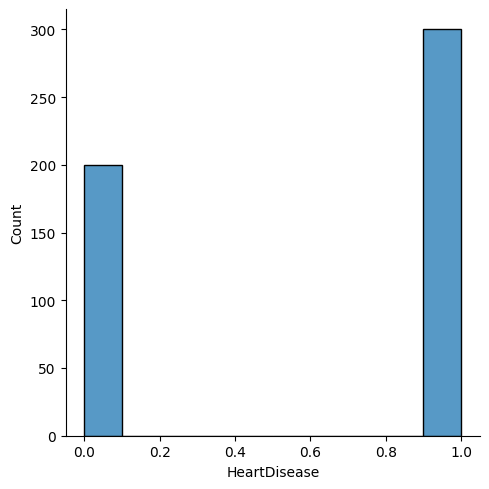

In [14]:
for col_name in df.columns:
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

Age


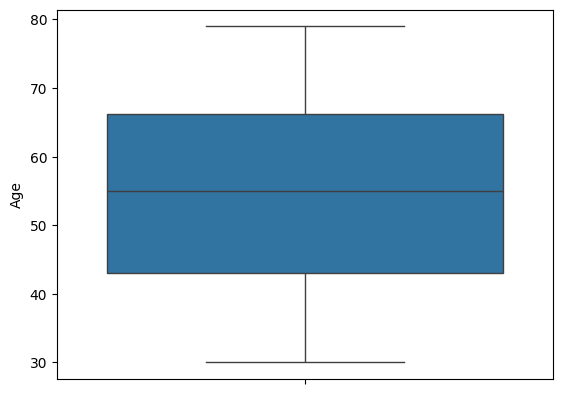

Gender


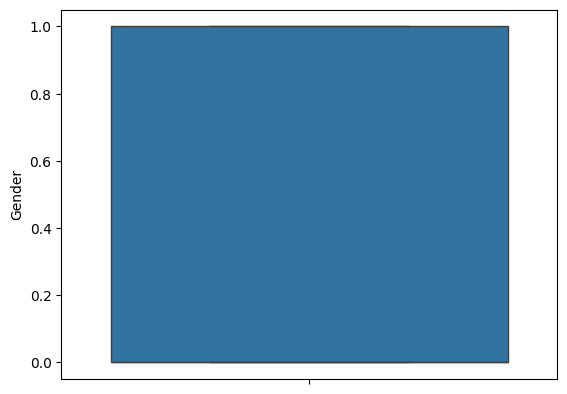

BloodPressure


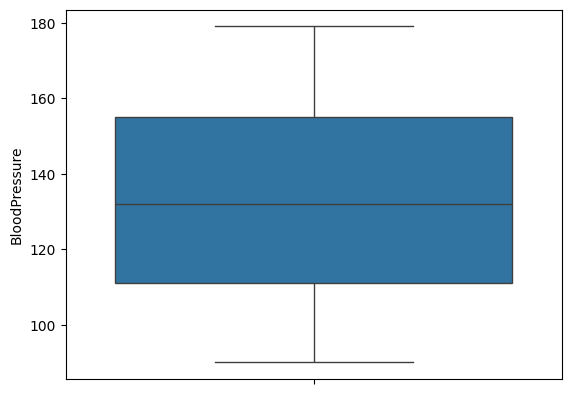

Cholesterol


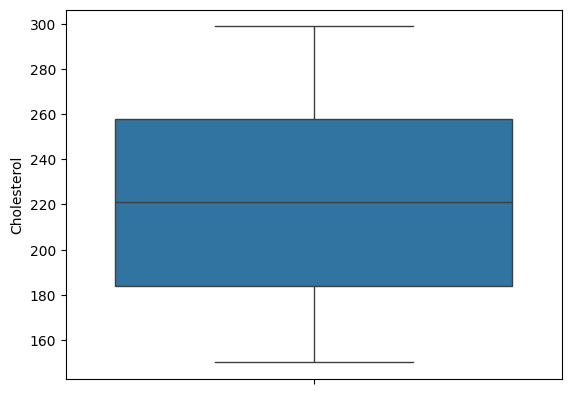

HeartRate


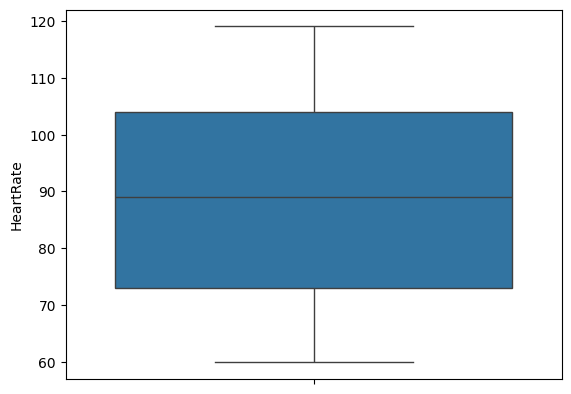

QuantumPatternFeature


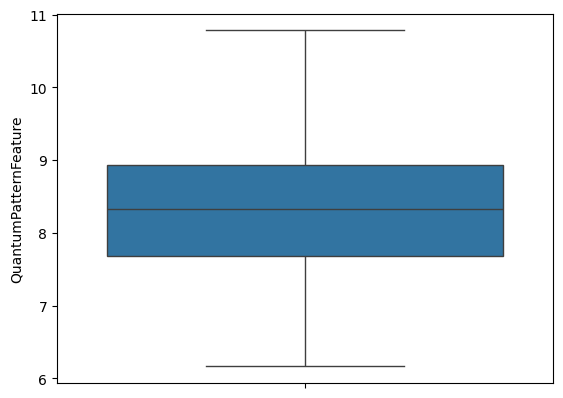

HeartDisease


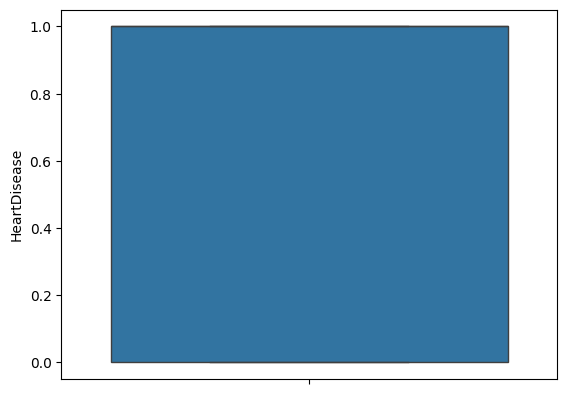

In [15]:
for col_name in df.columns:
    print(col_name)
    sns.boxplot(df[col_name])
    plt.show()

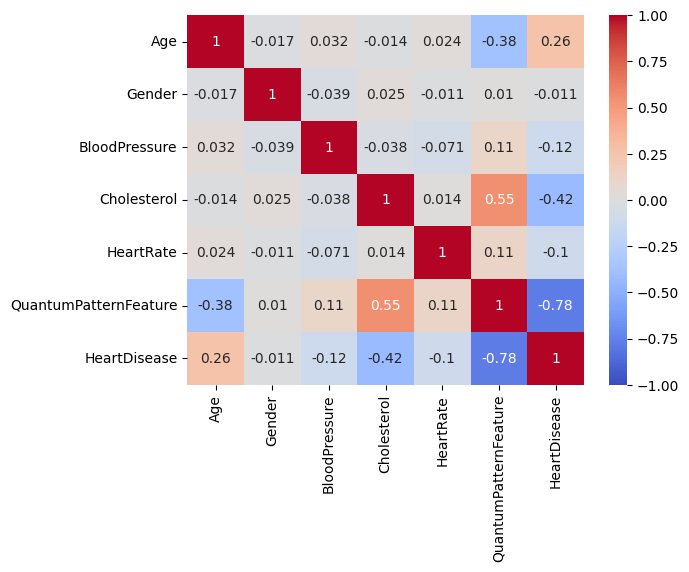

In [16]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

In [17]:
X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#average=0
#std dev=1
ss=StandardScaler()
X=ss.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
error_li=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error=1-accuracy_score(y_test,y_pred)
    error_li.append(error)

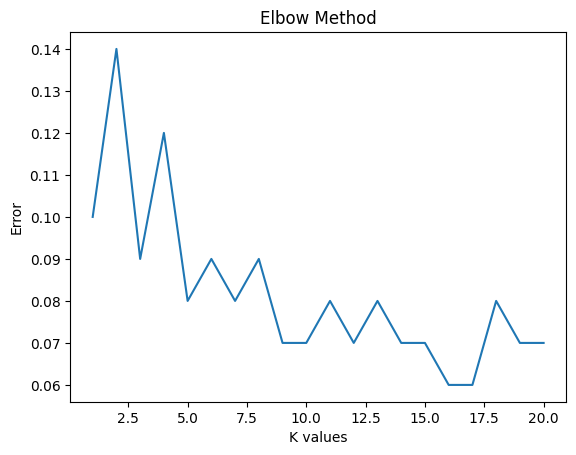

In [23]:
plt.title('Elbow Method')
plt.plot(range(1,21),error_li)
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()


In [24]:
knn=KNeighborsClassifier(n_neighbors=16, metric='euclidean')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.95      0.95      0.95        62

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

